In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [2]:
def load_data(train, test, fname) :
    fpath = "results/{}/eval/{}/{}.txt".format(train, test, fname)
    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original")
y_original_pred = load_data(train, test, "Y_original_pred")
y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

In [3]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 1 ... 5 1 7]


In [4]:
train = "fgsm"
test = "autopgd"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(fgsm,autopgd): [3 8 8 ... 5 1 7]
Y_adv_pred(fgsm,autopgd): [3 8 8 ... 5 1 7]


In [5]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [6]:
predictions = {}
labels = {}

for a1 in attacks :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = p
    labels[a1] = l

In [7]:
predictions

{'autoattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 2., 1., 7.]),
 'bim': array([3., 8., 8., ..., 3., 1., 7.]),
 'cw': array([3., 8., 8., ..., 2., 2., 2.]),
 'fgsm': array([3., 8., 8., ..., 3., 1., 2.]),
 'pgd': array([3., 8., 1., ..., 5., 1., 7.]),
 'deepfool': array([3., 8., 8., ..., 5., 0., 7.]),
 'newtonfool': array([3., 8., 8., ..., 2., 1., 7.]),
 'squareattack': array([3., 8., 1., ..., 6., 2., 2.]),
 'pixelattack': array([3., 3., 3., ..., 3., 3., 3.]),
 'spatialtransformation': array([3., 8., 1., ..., 5., 1., 7.])}

In [8]:
labels

{'autoattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'bim': array([3., 8., 8., ..., 5., 1., 7.]),
 'cw': array([3., 8., 8., ..., 5., 1., 7.]),
 'fgsm': array([3., 8., 8., ..., 5., 1., 7.]),
 'pgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'deepfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'newtonfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'squareattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'pixelattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'spatialtransformation': array([3., 8., 8., ..., 5., 1., 7.])}

In [9]:
accuracies = []
for a in attacks :
    accuracies.append(np.equal(predictions[a], labels[a]))
accuracies

[array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ..., False,  True,  True]),
 array([ True,  True,  True, ..., False,  True,  True]),
 array([ True,  True,  True, ..., False, False, False]),
 array([ True,  True,  True, ..., False,  True, False]),
 array([ True,  True, False, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True, False,  True]),
 array([ True,  True,  True, ..., False,  True,  True]),
 array([ True,  True, False, ..., False, False, False]),
 array([ True, False, False, ..., False, False, False]),
 array([ True,  True, False, ...,  True,  True,  True])]

In [10]:
accs = []
for a in attacks :
    tr = (labels[a] == predictions[a]).sum().item()
    accs.append(tr / len(labels[a]))
    
accs = pd.DataFrame(data={"attack": attacks, "accuracy": accs})
accs

,attack,accuracy
0,autoattack,0.751109
1,autopgd,0.753055
2,bim,0.750245
3,cw,0.736109
4,fgsm,0.753009
5,pgd,0.751318
6,deepfool,0.748455
7,newtonfool,0.732336
8,squareattack,0.637636
9,pixelattack,0.169918


In [11]:
def cosine_simmilarity(l1, l2):
    return 1 - distance.cosine(l1, l2)

# selected_attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack"] 
selected_attacks = attacks

sim = {}
for a1 in selected_attacks :
    s = {}
    for a2 in selected_attacks :
        acc1 = np.equal(predictions[a1], labels[a1])
        acc2 = np.equal(predictions[a2], labels[a2])   
        s[a2] = cosine_simmilarity(acc1, acc2)
#         s[a2] = cosine_simmilarity(predictions[a1], predictions[a2])
    sim[a1] = s
        

In [12]:
sim = pd.DataFrame(data=sim)
sim

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation
autoattack,1.000000,0.944893,0.931123,0.924213,0.928083,0.933193,0.941306,0.921675,0.863652,0.196603,0.808839
autopgd,0.944893,1.000000,0.932701,0.925350,0.927113,0.931709,0.941312,0.921708,0.864792,0.197086,0.807979
bim,0.931123,0.932701,1.000000,0.925503,0.930165,0.931914,0.928854,0.933231,0.859811,0.199543,0.808669
cw,0.924213,0.925350,0.925503,1.000000,0.919737,0.924390,0.927822,0.926784,0.865971,0.189291,0.823285
fgsm,0.928083,0.927113,0.930165,0.919737,1.000000,0.930685,0.925295,0.916864,0.857655,0.200015,0.804830
pgd,0.933193,0.931709,0.931914,0.924390,0.930685,1.000000,0.929852,0.922123,0.857411,0.196830,0.806979
deepfool,0.941306,0.941312,0.928854,0.927822,0.925295,0.929852,1.000000,0.923628,0.867564,0.189508,0.811718
newtonfool,0.921675,0.921708,0.933231,0.926784,0.916864,0.922123,0.923628,1.000000,0.868186,0.189469,0.816834
squareattack,0.863652,0.864792,0.859811,0.865971,0.857655,0.857411,0.867564,0.868186,1.000000,0.175626,0.807173
pixelattack,0.196603,0.197086,0.199543,0.189291,0.200015,0.196830,0.189508,0.189469,0.175626,1.000000,0.154061


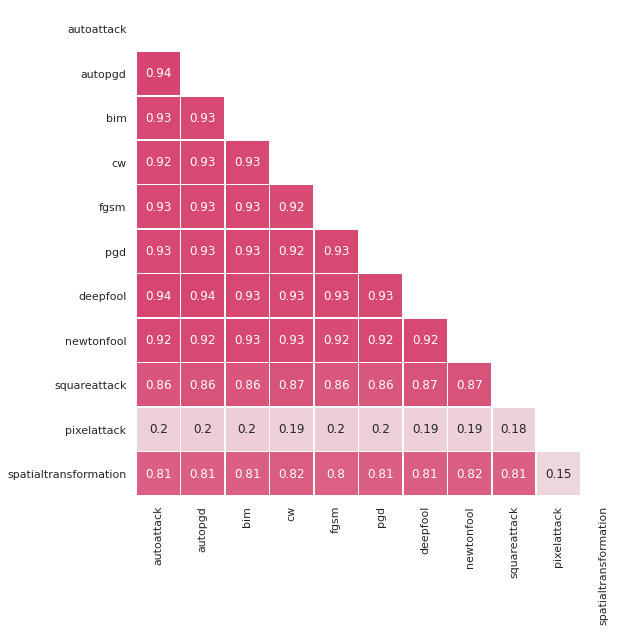

In [13]:
def plot_half_heatmap(data, cmap, path) :
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    f = sns.heatmap(data, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar=False, annot=True)
    f.figure.savefig(path, bbox_inches='tight')


# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)

path = "plot/rq1-sim.png"

plot_half_heatmap(sim, cmap, path)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


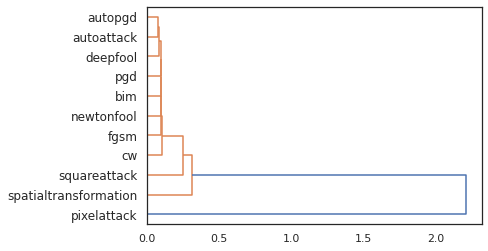

In [14]:
import scipy.cluster.hierarchy as hcluster
linkage = hcluster.linkage(1-sim)
dendro_label = selected_attacks
# dendro_label = sim.columns
dendro  = hcluster.dendrogram(linkage, labels=dendro_label, orientation="right")

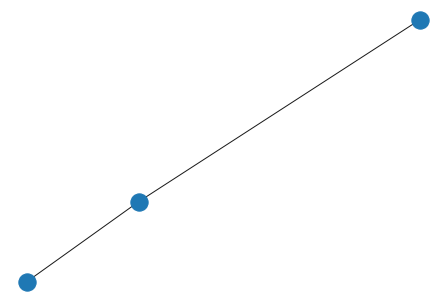

In [15]:
import networkx as nx
G = nx.Graph()
G.add_edge("A", "B")  # default edge data=1
G.add_edge("B", "C", weight=0.1)  # specify edge data

pos = nx.spring_layout(G)  # default to scale=1
nx.draw(G, pos)

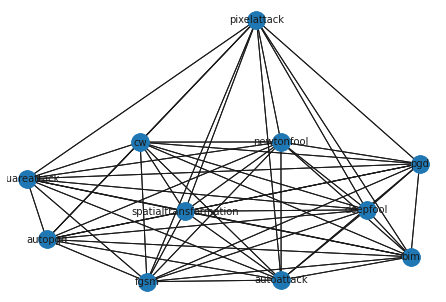

In [16]:
import networkx as nx
G = nx.Graph()

for a1 in attacks: 
    for a2 in attacks :
        G.add_edge(a1, a2, weight=sim[a1][a2])

pos = nx.spring_layout(G)  # default to scale=1
nx.draw(G, pos)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show() 

In [17]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

# cluster = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack"]
# cluster = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack"]
# cluster = ["autoattack", "autopgd", "bim", "pgd"]
cluster = ["pixelattack", "spatialtransformation"]

def get_centroid(cluster, sim) :
    val = {}
    for c in cluster :
        val[c] = 0
        for c2 in cluster :
            val[c] += sim[c][c2]
    max_dist = val[cluster[0]]
    idx = cluster[0]
    for c in cluster :
#         print(c, ": ", val[c])
        if val[c] > max_dist :
            max_dist = val[c]
            idx = c
    return idx
            
get_centroid(cluster, sim)

'pixelattack'

In [18]:
## Example from
# https://stackoverflow.com/questions/53194672/sklearn-dbscan-cosine-vs-precomputed

from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy import sparse

def cluster(X, metric="cosine"):
    cluster = DBSCAN(
        eps=0.5,
        min_samples=3,
        metric=metric,
        algorithm="brute"
    )

    cluster.fit_predict(X)

    return cluster

sentences = [
    "annuler ma commande",
    "commande à annuler",
    "merci de bien vouloir annuler ma commande",
    "produits cassés",
    "mes produits sont cassés",
    "ma commande de produits cassés"
]

vectorizer = TfidfVectorizer()
tfidfs = vectorizer.fit_transform(sentences)
distance_matrix = pairwise_distances(tfidfs, tfidfs, metric='cosine')

doc_id_to_cluster_1 = cluster(tfidfs, "cosine").labels_
doc_id_to_cluster_2 = cluster(sparse.csr_matrix(distance_matrix), "precomputed").labels_

print(doc_id_to_cluster_1)
print(doc_id_to_cluster_2)

[0 0 0 1 1 1]
[0 0 0 1 1 1]


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

def cluster(X, metric="cosine"):
    cluster = DBSCAN(
        eps=0.2,
        min_samples=1,
        metric=metric,
        algorithm="brute"
    )

    cluster.fit_predict(X)

    return cluster

labels = cluster(1-sim, "precomputed").labels_

print("Label :", labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.836


In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(affinity="precomputed", linkage='average')
labels = cluster.fit_predict(1-sim)

print("Label :", labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.836


In [21]:
from sklearn.cluster import AffinityPropagation

cluster = AffinityPropagation(affinity="precomputed")
labels = cluster.fit_predict(1-sim)

print("Label :", labels)
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


In [22]:
def get_cluster(labels, attacks) :
    cls = {}
    for l, a in zip(labels, attacks) :
        if l not in cls.keys() :
            cls[l] = []
        cls[l].append(a)
    return cls

get_cluster(labels, attacks)

{0: ['autoattack',
  'autopgd',
  'bim',
  'cw',
  'fgsm',
  'pgd',
  'deepfool',
  'newtonfool',
  'squareattack',
  'pixelattack',
  'spatialtransformation']}

In [23]:
def get_centroids(clusters) :
    cs = {}
    for k in clusters.keys() :
        cs[k] = get_centroid(clusters[k], sim)
    return cs

get_centroids(get_cluster(labels, sim))

{0: 'autopgd'}

In [24]:
from sklearn.cluster import KMeans

for i in range(2, 10) :
    kmeans = KMeans(n_clusters=i, random_state=0).fit(accuracies)
    labels = kmeans.labels_
    print()
    print("N cluster : ", i)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(accuracies, labels))
    print("Label : ", labels)
    print("Cluster : ", get_cluster(labels, attacks))
    print("Centroid : ", get_centroids(get_cluster(labels, attacks)))



N cluster :  2
Silhouette Coefficient: 0.508
Label :  [0 0 0 0 0 0 0 0 0 1 0]
Cluster :  {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack', 'spatialtransformation'], 1: ['pixelattack']}
Centroid :  {0: 'autopgd', 1: 'pixelattack'}

N cluster :  3
Silhouette Coefficient: 0.255
Label :  [0 0 0 0 0 0 0 0 0 1 2]
Cluster :  {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}
Centroid :  {0: 'autopgd', 1: 'pixelattack', 2: 'spatialtransformation'}

N cluster :  4
Silhouette Coefficient: 0.187
Label :  [0 0 0 0 0 0 0 0 3 1 2]
Cluster :  {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool'], 3: ['squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}
Centroid :  {0: 'autopgd', 3: 'squareattack', 1: 'pixelattack', 2: 'spatialtransformation'}

N cluster :  5
Silhouette Coefficient: 0.030
Label :  [3 3 0 0 3 3

In [25]:
from sklearn.cluster import AgglomerativeClustering

for i in range(2, 10) :
    cluster = AgglomerativeClustering(n_clusters=i, affinity="manhattan", linkage="average").fit(accuracies)
    labels = cluster.labels_
    print()
    print("N cluster : ", i)
    print("Label : ", labels)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(accuracies, labels))


N cluster :  2
Label :  [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.508

N cluster :  3
Label :  [0 0 0 0 0 0 0 0 0 1 2]
Silhouette Coefficient: 0.255

N cluster :  4
Label :  [0 0 0 0 0 0 0 0 3 1 2]
Silhouette Coefficient: 0.187

N cluster :  5
Label :  [1 1 0 0 1 1 1 0 3 4 2]
Silhouette Coefficient: 0.030

N cluster :  6
Label :  [0 0 1 5 0 0 0 1 3 4 2]
Silhouette Coefficient: 0.026

N cluster :  7
Label :  [0 0 1 5 6 0 0 1 3 4 2]
Silhouette Coefficient: 0.028

N cluster :  8
Label :  [1 1 0 5 6 7 1 0 3 4 2]
Silhouette Coefficient: 0.028

N cluster :  9
Label :  [0 0 8 5 6 7 0 4 3 1 2]
Silhouette Coefficient: 0.022


Automatically created module for IPython interactive environment
circles, perplexity=5 in 2 sec
circles, perplexity=30 in 3.9 sec
circles, perplexity=50 in 2.9 sec
circles, perplexity=100 in 6.2 sec


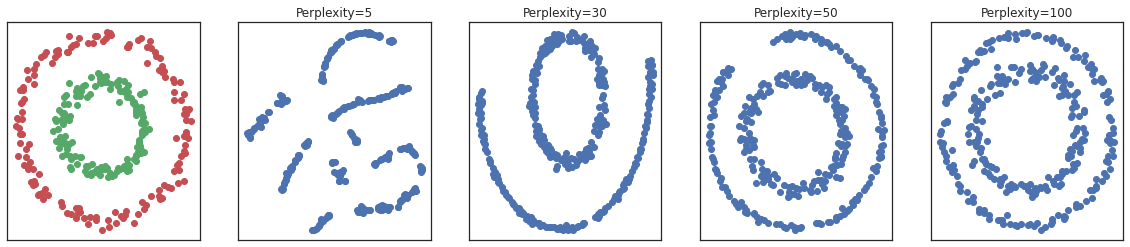

In [26]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(1, 5, figsize=(20, 4))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
#     print(Y)
    ax.scatter(Y[:,0], Y[:,1])
#     ax.scatter(Y[red, 0], Y[red, 1], c="r")
#     ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

Automatically created module for IPython interactive environment
circles, perplexity=5 in 1.5 sec
circles, perplexity=10 in 1.4 sec
circles, perplexity=30 in 1.7 sec
circles, perplexity=50 in 1.8 sec
circles, perplexity=100 in 2 sec


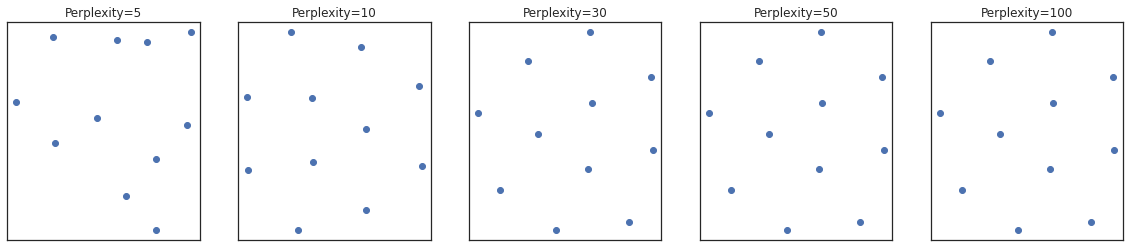

In [27]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(1, 5, figsize=(20, 4))
perplexities = [5, 10,  30, 50, 100]

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(accuracies)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:,0], Y[:,1])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')